In [3]:
import numpy as np
from PIL import Image
import os, glob, random

outfile = "./animals/photos.npz" 
max_photo = 100 
photo_size = 32 
x = [] 
y = [] 

def main():
    glob_files("./animals/dog", 0)
    glob_files("./animals/cat", 1)
    
    np.savez(outfile, x=x, y=y)
    print("保存しました:" + outfile, len(x))


def glob_files(path, label):
    files = glob.glob(path + "/*.jpg")
    random.shuffle(files)
    
    num = 0
    for f in files:
        if num >= max_photo: break
        num += 1
        
        img = Image.open(f)
        img = img.convert("RGB") 
        img = img.resize((photo_size, photo_size)) 
        img = np.asarray(img)
        x.append(img)
        y.append(label)

if __name__ == '__main__':
    main()


保存しました:./animals/photos.npz 200


In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop

# CNNモデル
def def_model(in_shape, nb_classes):
    model = Sequential()
    model.add(Conv2D(32,
              kernel_size=(3, 3),
              activation='relu',
              input_shape=in_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    return model


def get_model(in_shape, nb_classes):
    model = def_model(in_shape, nb_classes)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=RMSprop(),
        metrics=['accuracy'])
    return model


水増し前= 160
水増し後= 3840
Train on 3840 samples, validate on 40 samples
Epoch 1/26
3840/3840 [==============================] - 9s 2ms/step - loss: 0.6821 - acc: 0.5615 - val_loss: 0.6545 - val_acc: 0.7000
Epoch 2/26
3840/3840 [==============================] - 8s 2ms/step - loss: 0.5750 - acc: 0.7068 - val_loss: 0.5882 - val_acc: 0.7000
Epoch 3/26
3840/3840 [==============================] - 8s 2ms/step - loss: 0.4171 - acc: 0.8076 - val_loss: 0.3828 - val_acc: 0.8000
Epoch 4/26
3840/3840 [==============================] - 8s 2ms/step - loss: 0.2977 - acc: 0.8737 - val_loss: 0.5136 - val_acc: 0.8250
Epoch 5/26
3840/3840 [==============================] - 9s 2ms/step - loss: 0.2049 - acc: 0.9227 - val_loss: 0.3766 - val_acc: 0.8500
Epoch 6/26
3840/3840 [==============================] - 9s 2ms/step - loss: 0.1400 - acc: 0.9482 - val_loss: 0.3489 - val_acc: 0.8500
Epoch 7/26
3840/3840 [==============================] - 9s 2ms/step - loss: 0.1093 - acc: 0.9594 - val_loss: 0.3472 - val_acc: 0.

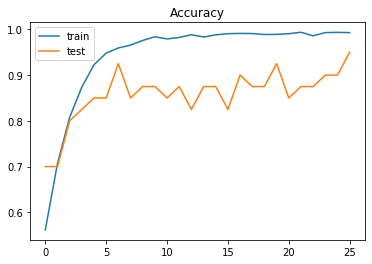

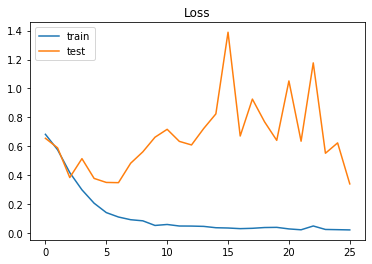

In [23]:
import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2


im_rows = 32 
im_cols = 32 
im_color = 3 
in_shape = (im_rows, im_cols, im_color)
nb_classes = 2

photos = np.load('./animals/photos.npz')
x = photos['x']
y = photos['y']

x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255

y = keras.utils.np_utils.to_categorical(y.astype('int32'), nb_classes)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=0.8)

x_new = []
y_new = []
for i, xi in enumerate(x_train):
    yi = y_train[i]
    for ang in range(-30, 30, 5):
        center = (16, 16) 
        mtx = cv2.getRotationMatrix2D(center, ang, 1.0)
        xi2 = cv2.warpAffine(xi, mtx, (32, 32))
        x_new.append(xi2)
        y_new.append(yi)

        xi3 = cv2.flip(xi2, 1)
        x_new.append(xi3)
        y_new.append(yi)

print('水増し前=', len(y_train))
x_train = np.array(x_new)
y_train = np.array(y_new)
print('水増し後=', len(y_train))

model = get_model(in_shape, nb_classes)


hist = model.fit(x_train, y_train,
          batch_size=64,
          epochs=26,
          verbose=1,
          validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

model.save_weights('./animals/photos-model.hdf5')


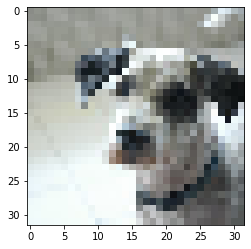

この写真は、 イヌ です！
可能性は、 100 %


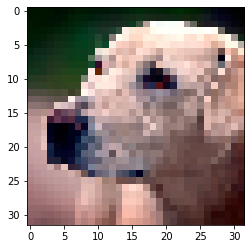

この写真は、 イヌ です！
可能性は、 100 %


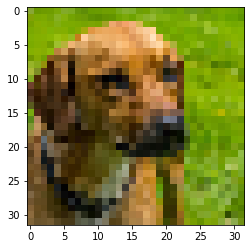

この写真は、 イヌ です！
可能性は、 100 %


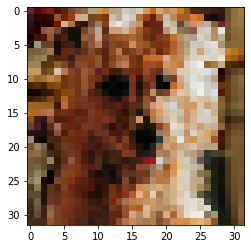

この写真は、 イヌ です！
可能性は、 100 %


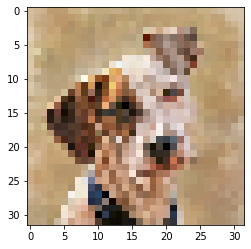

この写真は、 イヌ です！
可能性は、 100 %


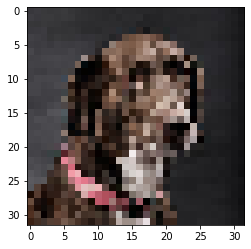

この写真は、 イヌ です！
可能性は、 76 %


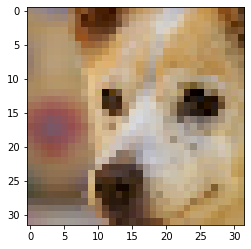

この写真は、 イヌ です！
可能性は、 99 %


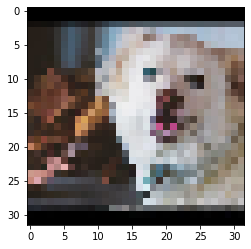

この写真は、 イヌ です！
可能性は、 99 %


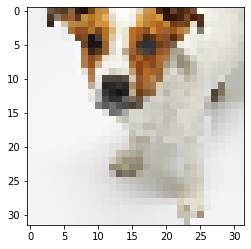

この写真は、 イヌ です！
可能性は、 99 %


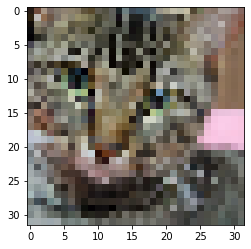

この写真は、 ネコ です！
可能性は、 100 %


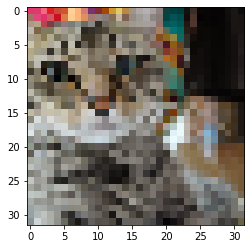

この写真は、 ネコ です！
可能性は、 99 %


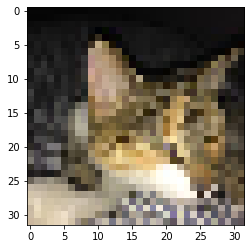

この写真は、 ネコ です！
可能性は、 100 %


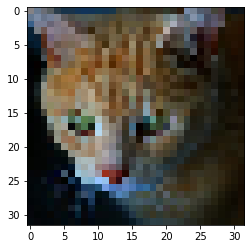

この写真は、 ネコ です！
可能性は、 100 %


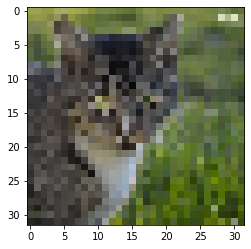

この写真は、 ネコ です！
可能性は、 99 %


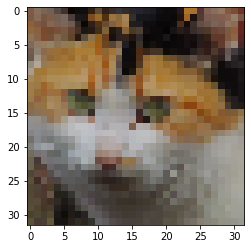

この写真は、 ネコ です！
可能性は、 99 %


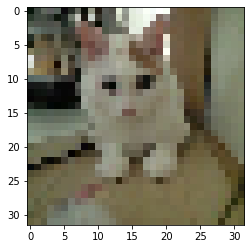

この写真は、 ネコ です！
可能性は、 99 %


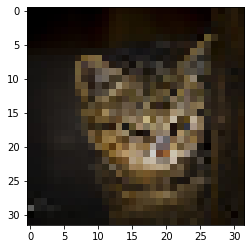

この写真は、 ネコ です！
可能性は、 100 %


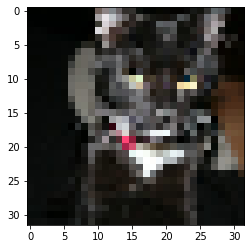

この写真は、 ネコ です！
可能性は、 100 %


In [5]:
import os 
import keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


im_rows = 32 # 画像の縦ピクセルサイズ
im_cols = 32 # 画像の横ピクセルサイズ
im_color = 3 # 画像の色空間
in_shape = (im_rows, im_cols, im_color)
nb_classes = 2

LABELS = ["イヌ", "ネコ"]

# 保存したCNNモデルを読み込む
model = get_model(in_shape, nb_classes)
model.load_weights('./animals/photos-model.hdf5')

def check_photo(path):
    # 画像を読み込む
    img = Image.open(path)
    img = img.convert("RGB") # 色空間をRGBに
    img = img.resize((im_cols, im_rows)) # サイズ変更
    plt.imshow(img)
    plt.show()
    # データに変換
    x = np.asarray(img)
    x = x.reshape(-1, im_rows, im_cols, im_color)
    x = x / 255

    # 予測
    pre = model.predict([x])[0]
    idx = pre.argmax()
    per = int(pre[idx] * 100)
    return (idx, per)

def check_photo_str(path):
    idx, per = check_photo(path)
    print("この写真は、", LABELS[idx], "です！")
    print("可能性は、", per, "%")

if __name__ == '__main__':
    files = os.listdir('./animals/images')
    images = len(files)
    for i in range(images):
        check_photo_str('./animals/images/image_' + str(i) + '.jpg')
